### Чтение данных.
Воспользуемся данными переписи населения. Целевая переменная - salary. Вам предлагается сделать бинарную классификацию, и определить по остальным признакам зарплату человека.

In [2]:
import pandas as pd
import numpy as np

# Считываем данные
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',)

# Назначаем имена колонок
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')

df.columns = columns.split() #этот метод разделит датасет по колонкам как в массиве columns

df.drop('education', 1, inplace=True) # это поле нам не понадобится, т.к. есть educ-num
df['salary>50'] = df['salary'].map({' <=50K': 0, ' >50K': 1}) # подготовим целевую переменную

df.head()

,age,workclass,fnlwgt,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary>50
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0


### 1. Анализ данных
1. Посмотрите, как вероятность зарабатывать >50K зависит от переменной `workclass`. (подсказка: `sns.barplot`)

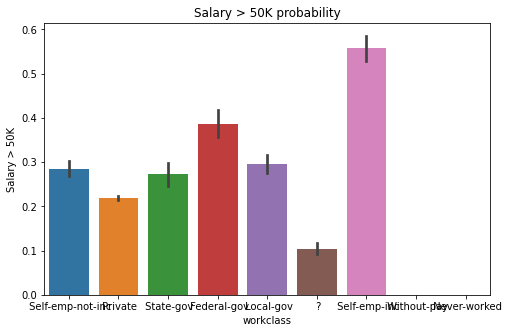

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1,  figsize=(8,5))

sns.barplot(x='workclass', y='salary>50', data=df, ax=ax)
plt.ylabel("Salary > 50K")
ax.set_title("Salary > 50K probability")
plt.show()

2. Так же от `educ-num` и `race`

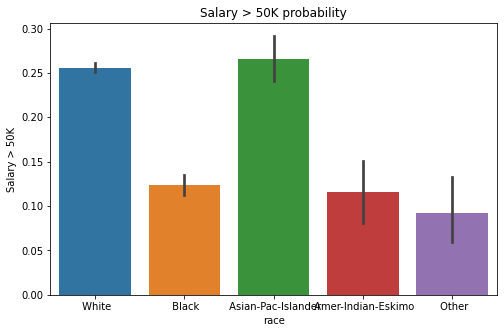

In [4]:
# YOUR CODE HERE
fig, ax = plt.subplots(1, 1,  figsize=(8,5))

sns.barplot(x='race', y='salary>50', data=df, ax=ax)
plt.ylabel("Salary > 50K")
ax.set_title("Salary > 50K probability")
plt.show()

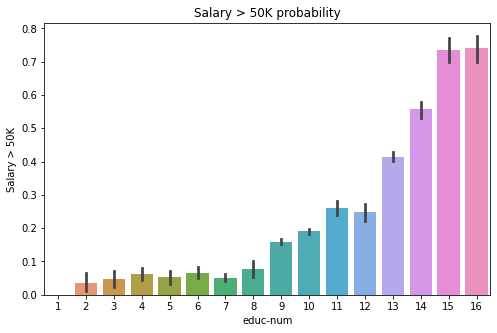

In [5]:
# YOUR CODE HERE
fig, ax = plt.subplots(1, 1,  figsize=(8,5))

sns.barplot(x='educ-num', y='salary>50', data=df, ax=ax)
plt.ylabel("Salary > 50K")
ax.set_title("Salary > 50K probability")
plt.show()

3. Постройте распределения по возрасту для двух значений целевой переменной (подсказка: `sns.violonplot`)

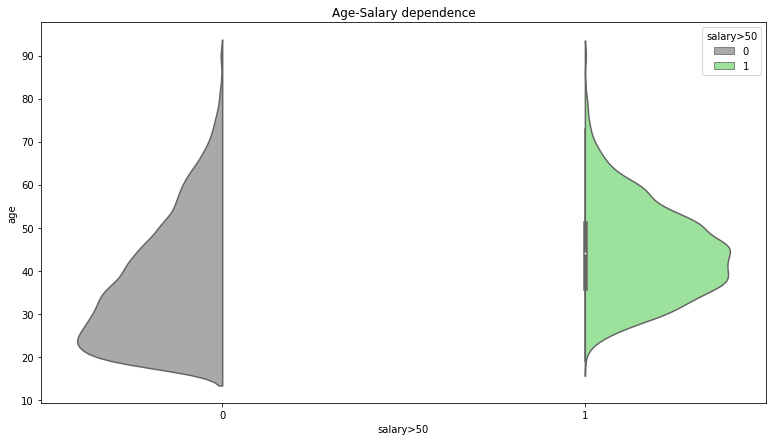

In [6]:
# YOUR CODE HERE
cm_surv = ["darkgrey" , "lightgreen"]

fig, ax = plt.subplots(figsize=(13,7))
sns.violinplot(x='salary>50', y='age',  hue='salary>50', data=df, split=True, palette=cm_surv, ax=ax)
plt.title('Age-Salary dependence')
plt.show()

Любые другие зависимости по желанию

In [7]:
# YOUR CODE HERE

### 2. Подготовка данных

In [8]:
X = df.iloc[:, :-2]
y = df['salary>50']
y.unique()

array([0, 1])

Разбейте датасет на тренировочную и тестовую части в соотношении 80:20. Используйте `random_state=42`

In [9]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

#### One-hot encoding
Сделайте one-hot-encoding категориальных признаков.  
Только не используйте `pd.get_dummies`, потому что данные уже разбиты на трейн и тест.  
Возможно, в тесте некоторых категорий не хватает.  
К тому же, подумайте, как Вы будете использовать `get_dummies`, когда нужно будет разворачивать модель на продакшен?  
На проде будет приходить по одному примеру, а `get_dummies` работает с целыми наборами данных.  

Поэтому, используйте класс `sklearn.preprocessing.OneHotEncoder` (описание: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).  
По использованию он похож на `StandardScaler`.

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
categorical_columns = 'workclass marital-status occupation relationship race sex native-country'.split()

# YOUR CODE HERE
num_columns = ['age', 'fnlwgt', 'educ-num', 'capital-gain', 'capital-loss', 'hours-per-week']
ohe = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = ohe.fit_transform(X_train[categorical_columns])
ohe_cols = ohe.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_cols, index=X_train.index)
X_train_ohe = pd.concat([X_train[num_columns], X_train_ohe], axis=1)

X_test_ohe = ohe.transform(X_test[categorical_columns])
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_cols, index=X_test.index)
X_test_ohe = pd.concat([X_test[num_columns], X_test_ohe], axis=1)

In [12]:
X_train_ohe.head()

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week,x0_ Federal-gov,x0_ Local-gov,x0_ Never-worked,x0_ Private,...,x6_ Portugal,x6_ Puerto-Rico,x6_ Scotland,x6_ South,x6_ Taiwan,x6_ Thailand,x6_ Trinadad&Tobago,x6_ United-States,x6_ Vietnam,x6_ Yugoslavia
24639,20,385077,8,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5514,21,140764,10,0,0,12,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19777,64,312242,10,0,0,3,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10781,26,227489,9,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32239,21,180190,11,0,0,46,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
X_test_ohe.head()

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week,x0_ Federal-gov,x0_ Local-gov,x0_ Never-worked,x0_ Private,...,x6_ Portugal,x6_ Puerto-Rico,x6_ Scotland,x6_ South,x6_ Taiwan,x6_ Thailand,x6_ Trinadad&Tobago,x6_ United-States,x6_ Vietnam,x6_ Yugoslavia
14160,38,680390,9,0,0,20,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27047,45,50567,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28867,29,185908,13,0,0,55,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5667,51,306108,16,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7827,46,124071,14,0,0,44,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Отмасштабируйте признаки с помощью `StandardScaler`

In [14]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_ohe)
X_test = scaler.transform(X_test_ohe)

### 3. Обучение моделей
Создайте любую модель и обучите на этих тренировочных данных. Сделайте предсказания на тестовых данных и сохраните в переменной `predictions`. Добейтесь того, чтобы `f1_score` на тестовых данных был не меньше `0.66`

In [15]:
# YOUR CODE HERE

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [18]:
params = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [5, 6, 7, 8, 10, 15],
}

gs = GridSearchCV(RandomForestClassifier(), params, cv=5, n_jobs=5, verbose=2, scoring='f1')

In [19]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'max_depth': [5, 6, 7, 8, 10, 15],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='f1', verbose=2)

In [22]:
predictions = gs.predict(X_test)

In [23]:
from sklearn.metrics import f1_score

print('f1_score:', f1_score(y_test, predictions))

f1_score: 0.6786743515850143


### *4. Кривая обучения

Как зависит качество модели от количества обучающих данных?  
Выясните это, построив график.  
Обучите логистическую регрессию сначала на 1% обучающей выборки, потом на 2% и т.д. до 100%. Измеряйте каждый раз `f1_score` на тестовых данных. Постройте график зависимости `f1_score` от количества данных.

In [74]:
# YOUR CODE HERE

def get_random_subsample(X, y, sample_size=0.5):
    n_samples = len(X)

    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    n_samples_to_take = int(n_samples * sample_size)
    sample_indices = indices[:n_samples_to_take]
    return X[sample_indices, :], y.iloc[sample_indices]

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
sizes = np.linspace(0.01, 1, 100)
sizes

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [78]:
from tqdm.notebook import tqdm

In [79]:
f1_scores = []
for sample_size in tqdm(sizes):
    X, y = get_random_subsample(X_train, y_train, sample_size)
    lr = LogisticRegression().fit(X, y)
    f1_scores.append(f1_score(y_test, lr.predict(X_test)))

  0%|          | 0/100 [00:00<?, ?it/s]

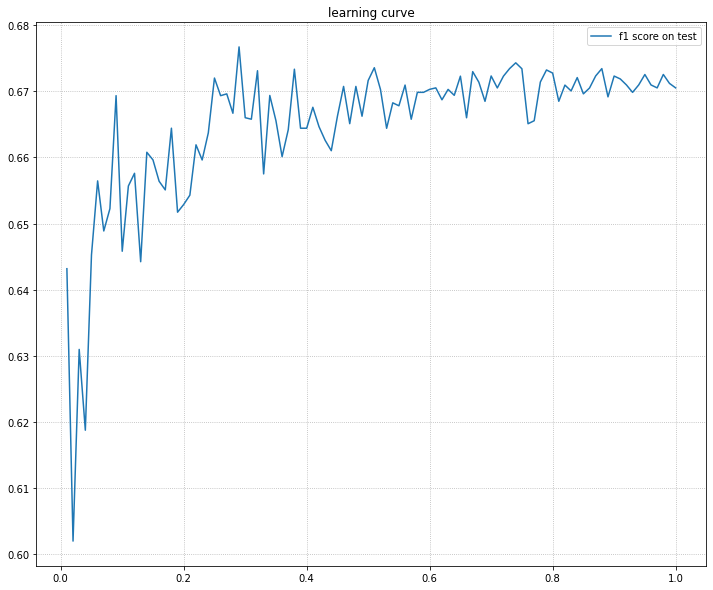

In [82]:
plt.figure(figsize=(12, 10))
plt.plot(sizes, f1_scores, label='f1 score on test')
plt.grid(ls=":")
plt.legend()
plt.title('learning curve')
plt.show()